In [1]:
import datetime as dt
import itertools
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('whitegrid')

In [2]:
tsv_path = '../dest/dominos_pizza_orders_transformed.tsv.gz'
df = pd.read_csv(tsv_path, sep='\t', compression='gzip', index_col=0)
df['datetime'] = pd.to_datetime(df['datetime'])

In [3]:
df.tail()

,order_id,price,title,size,modification,datetime
205,1787429,159.00,Pizza Country,Large,Standard,2017-04-14 23:21:00
206,1779208,255.00,Pizza Five Cheeses,Large,Standard,2017-04-11 22:21:00
207,1748645,218.19,Pizza Five Cheeses,Large,Standard,2017-04-01 23:59:00
208,1741877,217.99,Pizza Five Cheeses,Large,Standard,2017-03-30 22:11:00
209,1708978,219.99,Pizza Five Cheeses,Large,Standard,2017-03-19 00:23:00


In [4]:
pizza_df = df.loc[df.title.eq('Base') | df.title.str.match('Pizza')]
sides_df = df.loc[~(df.title.eq('Base') | df.title.str.match('Pizza'))]

Text(0.5, 1.0, 'The most frequent pizza')

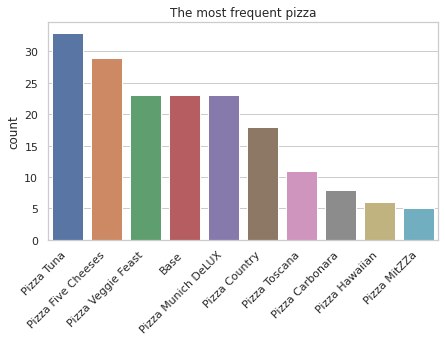

In [5]:
plt.figure(figsize=(7,4))
plot = sns.countplot(x='title', data=pizza_df, order=pd.value_counts(pizza_df['title']).iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plot.set(xlabel=None)
plt.title('The most frequent pizza')

Text(0.5, 1.0, 'The most frequent sides')

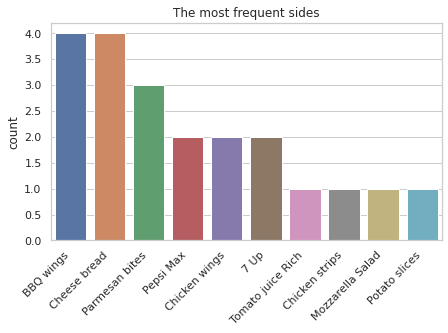

In [6]:
plt.figure(figsize=(7,4))
plot = sns.countplot(x='title', data=sides_df, order=pd.value_counts(sides_df['title']).iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plot.set(xlabel=None)
plt.title('The most frequent sides')

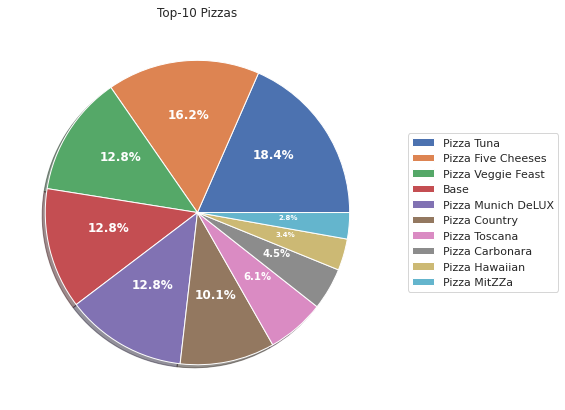

In [7]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))

data = pizza_df.title.value_counts().head(10)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if pct > 2:
        return "{:.1f}%\n".format(pct, absolute)
    return ''

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), shadow=True, )

ax.legend(wedges, pizza_df.title.value_counts().head(10).index,
          loc="center",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts[:6], size=12, weight="bold")
plt.setp(autotexts[6:8], size=10, weight="bold")
plt.setp(autotexts[8:], size=7, weight="bold")
ax.set_title('Top-10 Pizzas')
plt.show()

In [8]:
print(f"Average order price: {df.groupby('order_id')['price'].first().mean():.2f}")

Average order price: 344.37


In [9]:
print(f"Average number of pizzas to order: {df.groupby('order_id')['title'].count().mean():.2f}")

Average number of pizzas to order: 2.09


In [10]:
print(f"If you buy 'Medium' pizza, then:\
      {pizza_df.loc[pizza_df['size'].eq('Medium')].groupby('order_id')['title'].count().mean():.0f} at once")

If you buy 'Medium' pizza, then:      3 at once


In [11]:
print(f"If you buy 'Large' pizza, then: \
      {pizza_df.loc[pizza_df['size'].eq('Large')].groupby('order_id')['title'].count().mean():.0f} at once")

If you buy 'Large' pizza, then:       2 at once


Text(0.5, 1.0, 'Modifications')

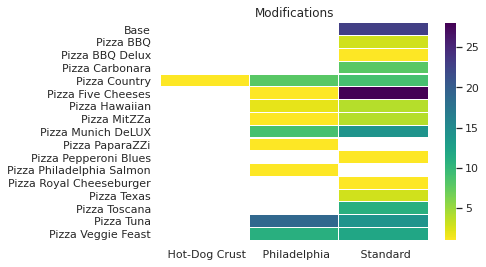

In [12]:
pt = pd.pivot_table(pizza_df, index = 'title', columns='modification', values='order_id', aggfunc='count')
plot = sns.heatmap(pt, cmap='viridis_r', linewidths=0.1, linecolor='white')
plot.set(xlabel=None, ylabel=None)
plt.title('Modifications')

In [13]:
pizza_df.set_index('datetime', inplace = True)
sides_df.set_index('datetime', inplace = True)

pizza_freq = pd.DataFrame(pizza_df.resample('1M').count()['title'].reset_index())
sides_freq = pd.DataFrame(sides_df.resample('1M').count()['title'].reset_index())

pizza_years = list(set(pizza_freq['datetime'].dt.year))
sides_years = list(set(sides_freq['datetime'].dt.year))

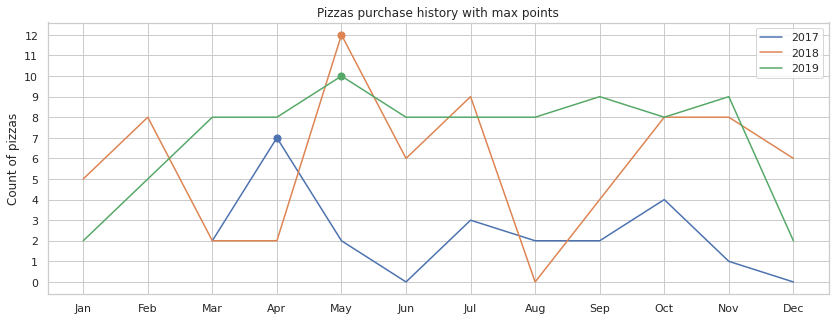

In [14]:
warnings.filterwarnings('ignore')

palette = itertools.cycle(sns.color_palette())

fig, ax = plt.subplots(1, figsize=(14,5))

for i, year in enumerate(pizza_years[:-1]): 
    pf = pizza_freq.loc[pizza_freq['datetime'].dt.year.eq(year)]
    pf['datetime'] = pf['datetime'].dt.month
    pf.set_index('datetime', inplace = True)
    c = next(palette)
    pf.plot(color=c, ax=ax)
    
    x = pf[pf['title'] == pf['title'].max()].index
    y = pf.loc[x]
    plt.scatter(x=x, y=y, marker='o', s=50)
    
plt.xlabel('')
tick = [_ for _ in range (1, 13, 1)]
plt.xticks(tick, ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) 
plt.ylabel('Count of pizzas', size=12)
plt.yticks([_ for _ in range (0, pizza_freq.title.max()+1)])
plt.legend(pizza_years[:-1], loc='higher right')
plt.title(f'Pizzas purchase history with max points', size=12)
    
plt.show()

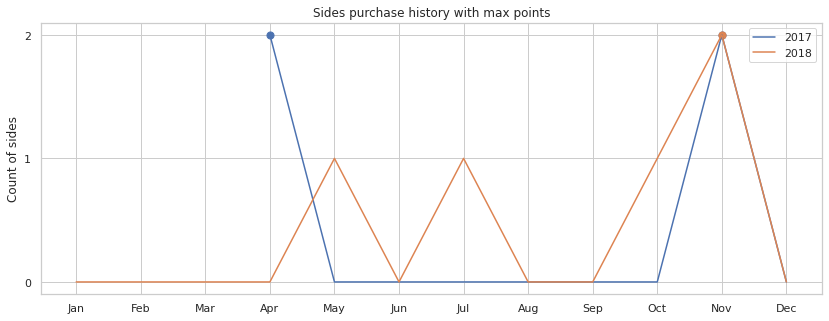

In [15]:
palette = itertools.cycle(sns.color_palette())

fig, ax = plt.subplots(1, figsize=(14,5))

for i, year in enumerate(sides_years[:-1]): 
    sf = sides_freq.loc[sides_freq['datetime'].dt.year.eq(year)]
    sf['datetime'] = sf['datetime'].dt.month
    sf.set_index('datetime', inplace = True)
    c = next(palette)
    sf.plot(color=c, ax=ax)
    
    x = sf[sf['title'] == sf['title'].max()].index
    y = sf.loc[x]
    plt.scatter(x=x, y=y, marker='o', s=50)
    
plt.xlabel('')
tick = [_ for _ in range (1, 13, 1)]
plt.xticks(tick, ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) 
plt.ylabel("Count of sides", size=12)
plt.yticks([_ for _ in range (0, sides_freq.title.max())])
plt.legend(sides_years[:-1], loc='higher right')
plt.title(f'Sides purchase history with max points', size=12)
    
plt.show()